In [213]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from seaborn import countplot

url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=2000"

In [214]:
headers = {'User-Agent': 'Mozilla/5.0'}

In [215]:
response = requests.get(url, headers=headers)


In [216]:
soup = BeautifulSoup(response.content, 'html.parser')

In [217]:
reviews = soup.find_all('div', class_='text_content')


In [218]:
review_texts = [review.text.strip() for review in reviews]

In [219]:
BAdata = pd.DataFrame({'Review': review_texts})


In [220]:
BAdata.to_csv('C:/Users/othma/OneDrive/Bureau/data/airline_reviews.csv', index=False)


In [221]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [222]:
data = pd.read_csv(r'C:\Users\othma\OneDrive\Bureau\data\airline_reviews.csv')

In [223]:
data.shape

(2000, 1)

In [224]:
data['Review'] = data ['Review'].str.strip()

In [225]:
data=data.drop_duplicates(subset=['Review'])

In [226]:
data['Review']=data['Review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [227]:
data.head()

,Review
0,Trip Verified British airways lost bags in...
1,Trip Verified The check in process and rewar...
2,Trip Verified We flew in November but it ...
3,Trip Verified I left for London from Johanne...
4,Trip Verified After an excellent flight on...


In [228]:
data['Review'] = data['Review'].str.lower()

In [229]:
import nltk
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\othma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\othma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\othma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [230]:
stop_words = set(stopwords.words('english'))
data['Review'] = data['Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [231]:
data.head()

,Review
0,trip verified british airways lost bags lhr fo...
1,trip verified check process rewardloyalty prog...
2,trip verified flew november took long seek sat...
3,trip verified left london johannesburg decembe...
4,trip verified excellent flight cpt lhr return ...


In [232]:
data.size

2000

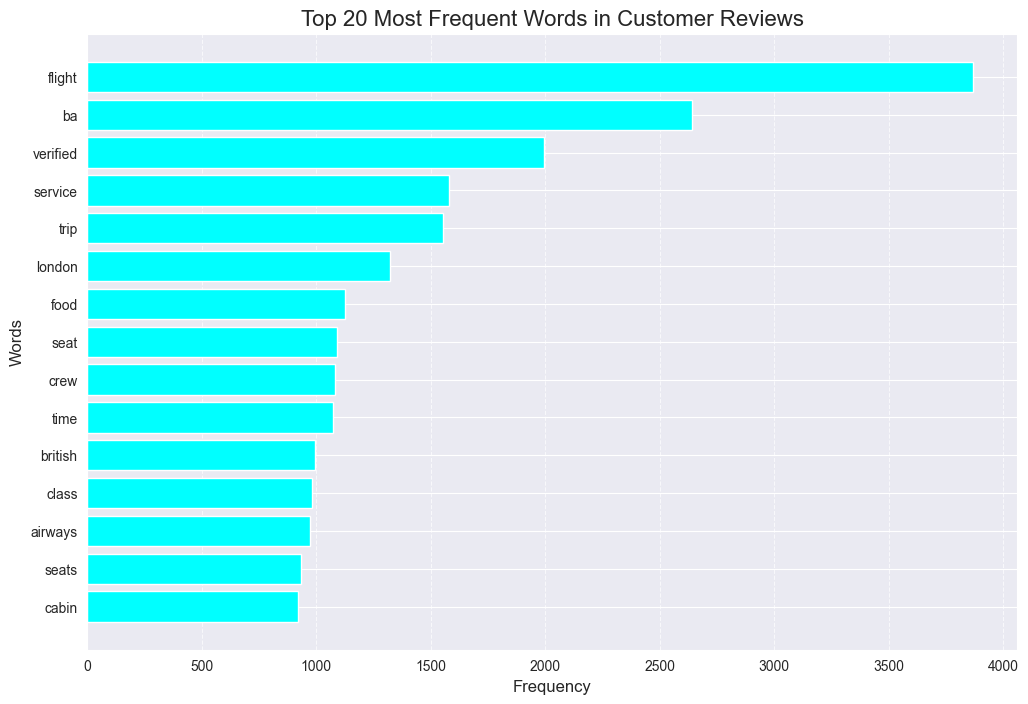

In [233]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Combine all reviews into a single string
text = " ".join(review for review in data['Review'])

# Define stopwords and split the text into individual words
stopwords = set(STOPWORDS)
words = [word.lower() for word in text.split() if word.lower() not in stopwords]

# Count word frequencies
word_counts = Counter(words)

# Get the 20 most common words
common_words = word_counts.most_common(15)
words, counts = zip(*common_words)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='cyan')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.title("Top 20 Most Frequent Words in Customer Reviews", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [241]:
# Converting text into numerical representation
vectorizer=CountVectorizer(stop_words='english')
X=vectorizer.fit_transform(data['Review'])

# Applying LDA (Topic Modeling)
lda=LatentDirichletAllocation(n_components=3 , random_state=42)
lda.fit(X)
#  Displaying topics
for idx, topic in enumerate(lda.components_):
    print(f"topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

topic #1:
['trip', 'time', 'cabin', 'service', 'food', 'good', 'verified', 'crew', 'ba', 'flight']


topic #2:
['london', 'seats', 'food', 'service', 'seat', 'verified', 'flight', 'business', 'ba', 'class']


topic #3:
['hours', 'service', 'told', 'airways', 'british', 'london', 'trip', 'verified', 'ba', 'flight']




In [235]:
#Sentiment Analysis
data['Sentiment']=data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [236]:
data['sentiment']=data['Review'].apply(lambda review :'Positiv' if TextBlob(review).sentiment.polarity>0
        else('Negative' if TextBlob(review).sentiment.polarity<0 else 'Neutral'))

In [237]:
#Print the results for all reviews
print(data[['Review', 'sentiment']].head(10))

                                              Review sentiment
0  trip verified british airways lost bags lhr fo...  Negative
1  trip verified check process rewardloyalty prog...  Negative
2  trip verified flew november took long seek sat...  Negative
3  trip verified left london johannesburg decembe...   Positiv
4  trip verified excellent flight cpt lhr return ...   Positiv
5  trip verified recent flight cyprus ba second c...   Positiv
6  trip verified flight ba arrived rome december ...  Negative
7  trip verified first time flew british airways ...   Positiv
8  trip verified pretty good flight still small t...   Positiv
9  trip verified check fine priorityfast track li...   Positiv


In [238]:
average_sentiment = data['Sentiment'].mean()

In [239]:
print(data['Sentiment'].mean())

0.06731987874427048


In [240]:
if average_sentiment < 0:
    print('Negative')
if average_sentiment > 0:
    print('Positive')
else :
    print('Neutral')

Positive
